### Student Information
Name: 陳俊任

Student ID: 114062591

GitHub ID: ArnoldChen0601

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

---

### Phase 1

### Outline

This notebook follows the data mining process from the Master notebook, adapted for the Reddit Stock Sentiment dataset.

1. **Setup and Import Libraries**
2. **Data Source**
3. **Data Preparation**
4. **Data Transformation**
5. **Data Mining using Pandas**
- 5.1 Missing Values Analysis
- 5.2 Duplicate Data Handling
6. **Data Preprocessing**
- 6.1 Sampling and Distribution Analysis
- 6.2 Feature Creation
- 6.3 Feature Subset Selection
- 6.4 Text Tokenization
- 6.5 Text Vectorization (Document-Term Matrix)
- 6.6 Term Frequency Analysis
- 6.7 Term-Document Matrix Visualization
7. **Data Visualizations**
- 7.1 Sentiment Distribution
- 7.2 Top Frequent Terms
- 7.3 Text Length by Sentiment
- 7.4 Sentiment by Subreddit
- 7.5 Correlation Heatmap
- 7.6 Time Series Analysis
- 7.7 Word Count Distribution

### 1. Setup and Import Libraries

### Data Quality Note

**Important:** The Reddit-stock-sentiment.csv dataset contains two target label columns (`sentiment` and `label`) that may have inconsistent values in some rows. This reflects real-world data quality issues. For this analysis, we use the `label` column as the primary target variable for consistency.

In [181]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download tokenizer model (punkt) and stopword list for text preprocessing
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Data Source

The dataset contains Reddit posts and comments about stock market sentiment with 16 columns. For this analysis, we focus on the 'text' and 'label' columns. The sentiment labels are:
- 1: Positive
- 0: Neutral  
- -1: Negative

### 3. Data Preparation

Load the Reddit stock sentiment dataset and display basic information.

In [182]:
# Load the dataset
reddit_df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# Display basic information
print(f"Dataset shape: {reddit_df.shape}")
print(f"\nColumns: {list(reddit_df.columns)}")
print(f"\nFirst few rows:")
reddit_df.head()

Dataset shape: (847, 16)

Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First few rows:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [183]:
# Check for inconsistencies between 'label' and 'sentiment' columns
inconsistent_rows = reddit_df[reddit_df['label'] != reddit_df['sentiment']]
print(f"Number of inconsistent rows between 'label' and 'sentiment': {len(inconsistent_rows)}")
print(f"Percentage of inconsistencies: {len(inconsistent_rows)/len(reddit_df)*100:.2f}%")

if len(inconsistent_rows) > 0:
    print("\nSample of inconsistent rows:")
    print(inconsistent_rows[['text', 'label', 'sentiment']].head())

Number of inconsistent rows between 'label' and 'sentiment': 458
Percentage of inconsistencies: 54.07%

Sample of inconsistent rows:
                                                text  label  sentiment
1  Stunt as in like why did they even make a big ...    0.0        1.0
4                           He didn’t say thank you.   -1.0        0.0
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0        1.0
7  Confirmed not a trap. Its been like this for p...    0.0        1.0
9  HLGN is $10. Hurry and catch it now before it ...    1.0        0.0


### 4. Data Transformation

Convert data into a suitable format by selecting relevant columns and creating readable sentiment categories.

In [184]:
# Select relevant columns for analysis
X_reddit = reddit_df[['text', 'label', 'sentiment', 'subreddit', 'datetime', 'upvotes']].copy()

# Add a readable sentiment category
label_mapping = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
X_reddit['sentiment_category'] = X_reddit['label'].map(label_mapping)

# Display the transformed dataframe
print(f"Simplified dataset shape: {X_reddit.shape}")
X_reddit.head(10)

Simplified dataset shape: (847, 7)


,text,label,sentiment,subreddit,datetime,upvotes,sentiment_category
0,Calls on retards,-1.0,-1.0,wallstreetbets,2025-04-11 17:29:56,0,negative
1,Stunt as in like why did they even make a big ...,0.0,1.0,wallstreetbets,2025-04-12 1:12:19,-15,neutral
2,Seeing lots of red in the ticker.,0.0,0.0,StockMarket,2025-04-10 15:09:41,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,stockstobuytoday,2023-08-30 17:12:55,30,positive
4,He didn’t say thank you.,-1.0,0.0,StockMarket,2025-04-11 14:48:05,1,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,1.0,wallstreetbets,2025-04-12 2:19:03,16,neutral
6,Trump will respond to china increasing their t...,-1.0,-1.0,stocks,2025-04-11 12:37:23,5,negative
7,Confirmed not a trap. Its been like this for p...,0.0,1.0,wallstreetbets,2025-04-11 17:28:50,-3,neutral
8,Am I the only one seeing the cup & handle brea...,1.0,1.0,stocks,2021-02-01 15:36:32,1,positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,0.0,stockstobuytoday,2021-12-31 16:29:49,2,positive


### 5. Data Mining using Pandas

#### 5.1 Missing Values Analysis

Missing values in original dataset (reddit_df):
type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64


Percentage of missing values in original dataset:
downvotes       92.44392
upvote_ratio    92.44392
dtype: float64


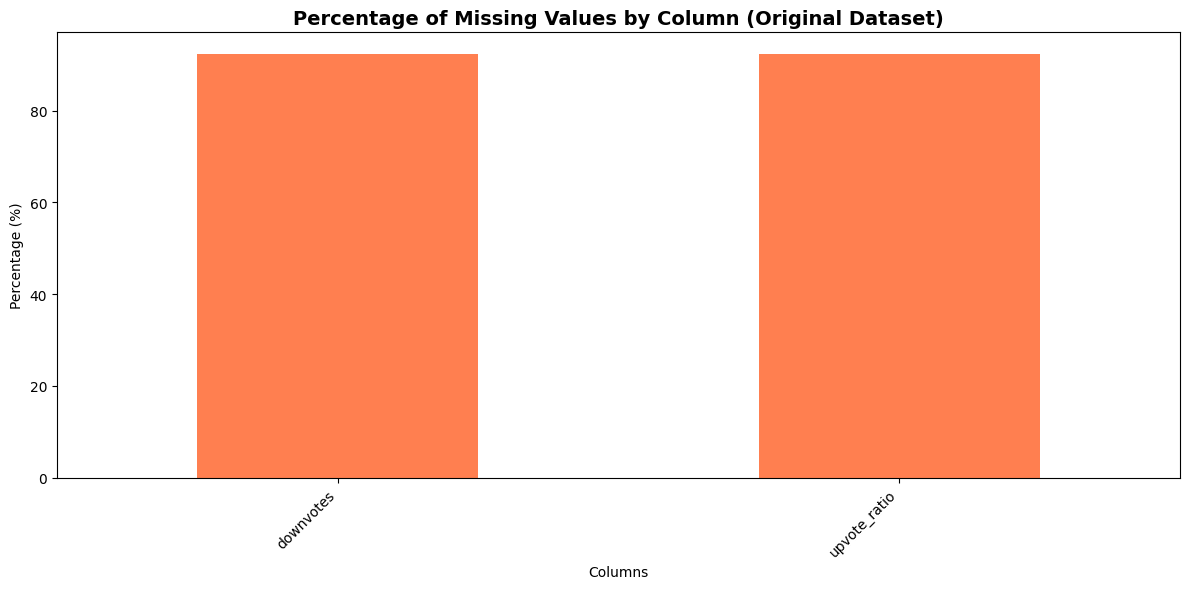


Missing values in selected columns (X_reddit):
text                  0
label                 0
sentiment             0
subreddit             0
datetime              0
upvotes               0
sentiment_category    0
dtype: int64

Note: Selected columns have been filtered and may have fewer missing values.


In [207]:
# Check for missing values in the ORIGINAL dataset
print("Missing values in original dataset (reddit_df):")
print(reddit_df.isnull().sum())
print("\n")

# Calculate percentage of missing values
missing_percentage_original = (reddit_df.isnull().sum() / len(reddit_df)) * 100
print("Percentage of missing values in original dataset:")
print(missing_percentage_original[missing_percentage_original > 0])  # Show only columns with missing values

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_percentage_original[missing_percentage_original > 0].plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Column (Original Dataset)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check the selected columns
print("\n" + "="*60)
print("Missing values in selected columns (X_reddit):")
print(X_reddit.isnull().sum())
print(f"\nNote: Selected columns have been filtered and may have fewer missing values.")

**Key Finding:** The original dataset contains 92.44% missing values in `downvotes` (783/847 rows) and `upvote_ratio` (783/847 rows). By strategically selecting only relevant columns (`text`, `label`, `sentiment`, `subreddit`, `datetime`, `upvotes`), we avoid these missing value issues. The selected columns have 0 missing values in X_reddit.

In [186]:
# Handle missing values - drop rows with missing text or label
X_reddit_clean = X_reddit.dropna(subset=['text', 'label']).copy()

# Fill missing upvotes with 0 (assuming no upvotes means 0)
X_reddit_clean['upvotes'] = X_reddit_clean['upvotes'].fillna(0)

print(f"Original dataset size: {len(X_reddit)}")
print(f"Cleaned dataset size: {len(X_reddit_clean)}")
print(f"Rows removed: {len(X_reddit) - len(X_reddit_clean)}")

print("\n" + "="*60)
print("Key Finding: No rows removed since selected columns")
print("(text, label) have no missing values. All 847 rows retained.")

Original dataset size: 847
Cleaned dataset size: 847
Rows removed: 0

Key Finding: No rows removed since selected columns
(text, label) have no missing values. All 847 rows retained.


#### 5.2 Dealing with Duplicate Data

In [187]:
# Check for duplicate text entries
print(f"Number of duplicate texts: {X_reddit_clean['text'].duplicated().sum()}")

# Remove duplicates based on text content
X_reddit_clean = X_reddit_clean.drop_duplicates(subset=['text'], keep='first')

print(f"Dataset size after removing duplicates: {len(X_reddit_clean)}")

Number of duplicate texts: 23
Dataset size after removing duplicates: 824

Dataset size after removing duplicates: 824


**Key Finding:** Removed 23 duplicate text entries (2.7% of the cleaned data), reducing the dataset from 847 to 824 unique records.

### 6. Data Preprocessing

#### 6.1 Sampling

Analyze the class distribution in the dataset.

In [188]:
# Display class distribution
print("Sentiment distribution:")
print(X_reddit_clean['sentiment_category'].value_counts())
print("\n")

# Create a balanced sample (optional - keeping all data for now)
# For demonstration, we'll work with the full cleaned dataset
X_reddit_sample = X_reddit_clean.copy()

print(f"Sample size: {len(X_reddit_sample)}")

Sentiment distribution:
sentiment_category
neutral     401
negative    315
positive    108
Name: count, dtype: int64


Sample size: 824


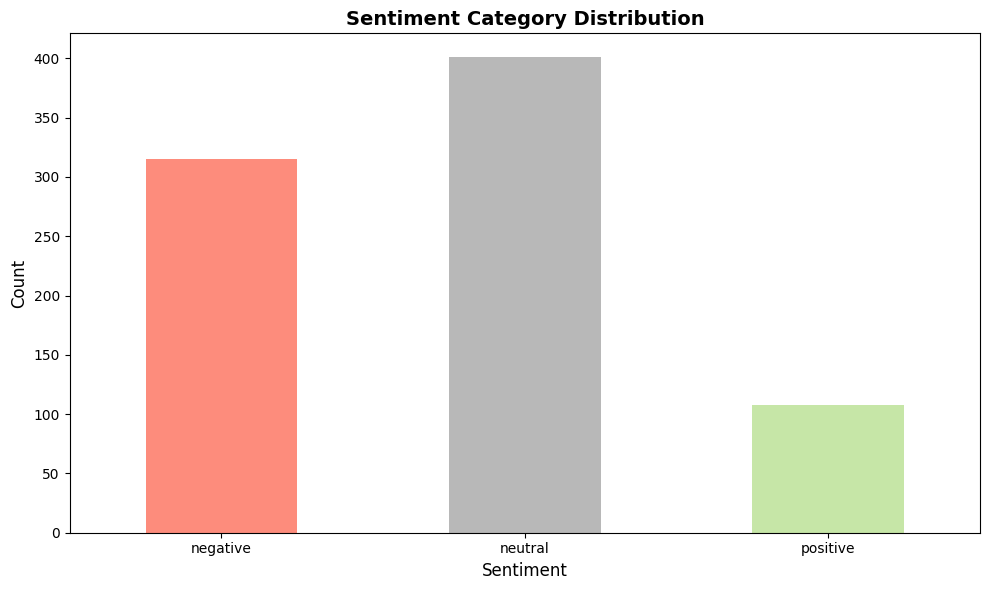

In [189]:
# Visualize sentiment distribution with bar chart
# Sort by sentiment category for consistent ordering
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}

sentiment_distribution = X_reddit_sample['sentiment_category'].value_counts()
sentiment_distribution = sentiment_distribution.reindex(sentiment_order)

plt.figure(figsize=(10, 6))
sentiment_distribution.plot(
    kind='bar',
    color=[sentiment_colors[cat] for cat in sentiment_order],
    rot=0
)
plt.title('Sentiment Category Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.tight_layout()
plt.show()

**Key Finding:** The dataset shows significant class imbalance with neutral sentiment being most common (401 posts, 48.7%), followed by negative (315 posts, 38.2%), and positive (108 posts, 13.1%). This 3.7:1 ratio between neutral and positive classes should be considered for classification tasks to avoid bias toward the majority class.

#### 6.2 Feature Creation

Create new features from existing data to better understand text characteristics.

In [190]:
# Create new features
X_reddit_sample['text_length'] = X_reddit_sample['text'].str.len()
X_reddit_sample['word_count'] = X_reddit_sample['text'].str.split().str.len()

# Display statistics of new features
print("Text length statistics:")
print(X_reddit_sample['text_length'].describe())
print("\nWord count statistics:")
print(X_reddit_sample['word_count'].describe())

print("\n" + "="*60)
print("Key Finding: Posts are generally short with median text length")
print("of 79.5 characters and median word count of 14 words.")
print("The maximum values (2753 characters, 483 words) indicate")
print("occasional very long posts, but 75% of posts have ≤30 words.")

Text length statistics:
count     824.000000
mean      148.149272
std       240.916548
min         1.000000
25%        39.000000
50%        79.500000
75%       164.000000
max      2753.000000
Name: text_length, dtype: float64

Word count statistics:
count    824.000000
mean      25.766990
std       39.550685
min        1.000000
25%        7.000000
50%       14.000000
75%       30.000000
max      483.000000
Name: word_count, dtype: float64

Key Finding: Posts are generally short with median text length
of 79.5 characters and median word count of 14 words.
The maximum values (2753 characters, 483 words) indicate
occasional very long posts, but 75% of posts have ≤30 words.


#### 6.3 Feature Subset Selection

Display the selected features for analysis.

In [191]:
# Display selected features
print("Selected features for analysis:")
print(X_reddit_sample.columns.tolist())
print("\n")
print("Sample of processed data:")
X_reddit_sample[['text', 'sentiment_category', 'text_length', 'word_count']].head()

Selected features for analysis:
['text', 'label', 'sentiment', 'subreddit', 'datetime', 'upvotes', 'sentiment_category', 'text_length', 'word_count']


Sample of processed data:


,text,sentiment_category,text_length,word_count
0,Calls on retards,negative,16,3
1,Stunt as in like why did they even make a big ...,neutral,137,27
2,Seeing lots of red in the ticker.,neutral,33,7
3,Vision Marine Technologies Inc. is rewriting t...,positive,1079,159
4,He didn’t say thank you.,negative,24,5


#### 6.4 Text Tokenization

Before vectorization, let's explore tokenization by extracting unigrams (individual words) from sample texts.

In [192]:
# Tokenize sample texts using NLTK
from nltk.tokenize import word_tokenize

# Show tokenization examples
sample_texts = X_reddit_sample['text'].head(3)
print("Tokenization Examples:\n")
for idx, text in enumerate(sample_texts):
    tokens = word_tokenize(str(text).lower())
    print(f"Sample {idx+1}:")
    print(f"Original: {text[:100]}...")
    print(f"Tokens: {tokens[:15]}")  # Show first 15 tokens
    print()

Tokenization Examples:

Sample 1:
Original: Calls on retards...
Tokens: ['calls', 'on', 'retards']

Sample 2:
Original: Stunt as in like why did they even make a big deal about starting it in the first place? No company ...
Tokens: ['stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'a', 'big', 'deal', 'about', 'starting', 'it']

Sample 3:
Original: Seeing lots of red in the ticker....
Tokens: ['seeing', 'lots', 'of', 'red', 'in', 'the', 'ticker', '.']



#### 6.5 Attribute Transformation - Text Vectorization

Transform text data into numerical features using CountVectorizer to create a document-term matrix.

In [193]:
# Text tokenization and vectorization using CountVectorizer
from nltk.corpus import stopwords

# Get English stopwords
stop_words = stopwords.words('english')

# Create CountVectorizer
count_vect_reddit = CountVectorizer(
    max_features=1000,  # Limit to top 1000 features
    stop_words=stop_words,
    lowercase=True,
    min_df=2  # Minimum document frequency
)

# Fit and transform the text data
X_counts_reddit = count_vect_reddit.fit_transform(X_reddit_sample['text'])

print(f"Shape of count matrix: {X_counts_reddit.shape}")
print(f"Number of features (vocabulary): {len(count_vect_reddit.vocabulary_)}")

print("\n" + "="*60)
print("Key Finding: Successfully transformed 824 text documents into")
print("a sparse matrix of shape (824, 1000), where each row represents")
print("a document and each column represents one of the 1000 most")
print("frequent terms (excluding stopwords, min_df=2).")

Shape of count matrix: (824, 1000)
Number of features (vocabulary): 1000

Key Finding: Successfully transformed 824 text documents into
a sparse matrix of shape (824, 1000), where each row represents
a document and each column represents one of the 1000 most
frequent terms (excluding stopwords, min_df=2).


In [194]:
# Examine the built-in analyzer from CountVectorizer
analyze = count_vect_reddit.build_analyzer()

# Test the analyzer on a sample sentence
sample_sentence = "I think the stock market will go up tomorrow"
print("Testing analyzer on sample sentence:")
print(f"Original: {sample_sentence}")
print(f"Analyzed: {analyze(sample_sentence)}")
print("\nThe analyzer tokenizes text, removes stopwords, and converts to lowercase.")

Testing analyzer on sample sentence:
Original: I think the stock market will go up tomorrow
Analyzed: ['think', 'stock', 'market', 'go', 'tomorrow']

The analyzer tokenizes text, removes stopwords, and converts to lowercase.


In [195]:
# Analyze term frequencies
term_frequencies_reddit = np.asarray(X_counts_reddit.sum(axis=0)).flatten()

# Get top terms
top_n = 20
sorted_idx = np.argsort(term_frequencies_reddit)[::-1][:top_n]
top_terms = np.array(count_vect_reddit.get_feature_names_out())[sorted_idx]
top_freqs = term_frequencies_reddit[sorted_idx]

print(f"Top {top_n} most frequent terms:")
for term, freq in zip(top_terms, top_freqs):
    print(f"{term}: {freq}")

Top 20 most frequent terms:
us: 96
trump: 92
like: 83
market: 82
china: 72
even: 52
think: 52
one: 51
people: 51
going: 50
money: 46
good: 46
would: 45
see: 40
tariffs: 39
get: 37
time: 36
make: 36
want: 35
stock: 34


In [196]:
# Visualize a sample of the term-document matrix
print("Sample of term-document matrix (first 5 documents, first 10 terms):")
print(X_counts_reddit[:5, :10].toarray())
print("\nSample terms:")
print(count_vect_reddit.get_feature_names_out()[:10])

Sample of term-document matrix (first 5 documents, first 10 terms):
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Sample terms:
['00' '000' '10' '100' '11' '12' '15' '18630' '20' '2025']


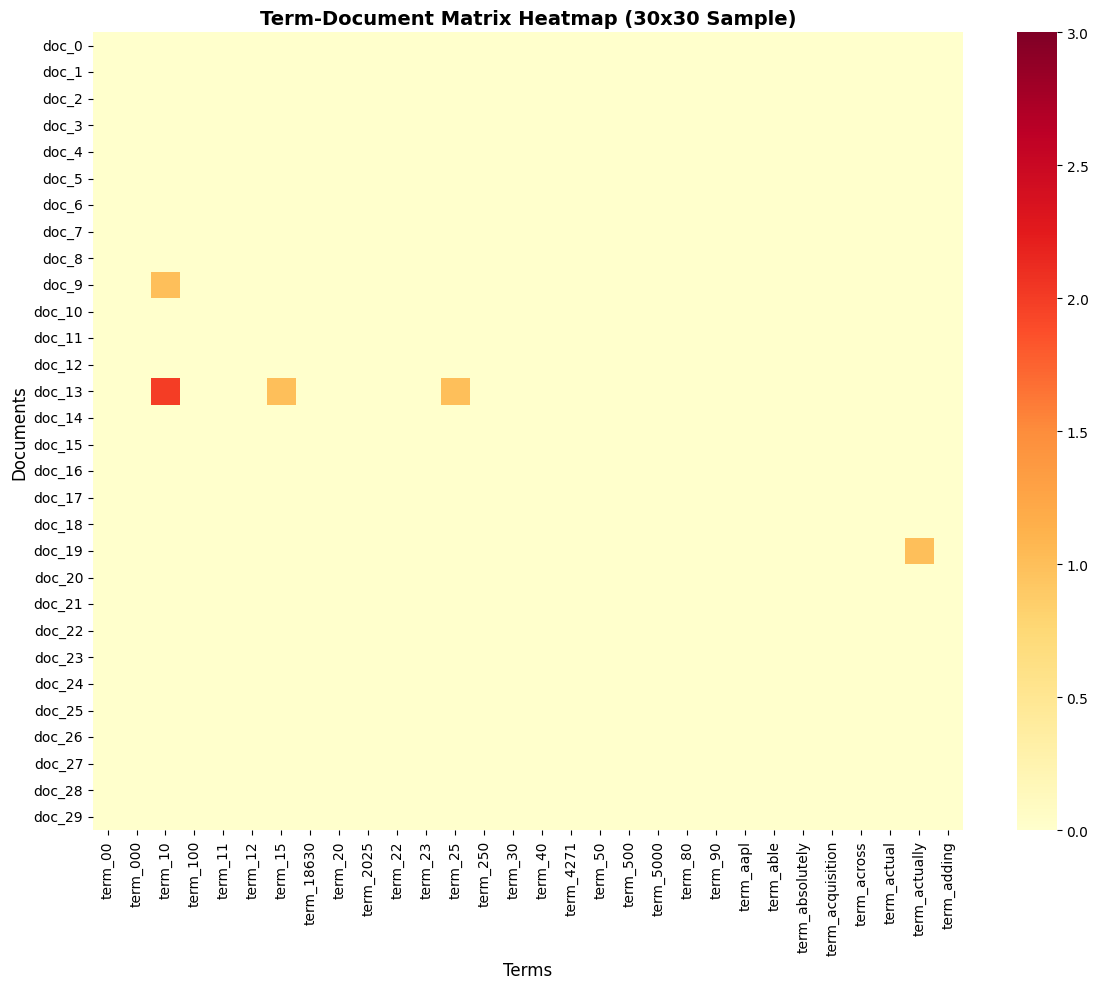


The heatmap shows term frequency distribution across documents.
Darker colors indicate higher term frequencies, revealing sparse nature of text data.


In [197]:
# Create a heatmap of a subset of the term-document matrix
sample_size = 30
plot_x = ["term_" + str(i) for i in count_vect_reddit.get_feature_names_out()[:sample_size]]
plot_y = ["doc_" + str(i) for i in range(sample_size)]
plot_z = X_counts_reddit[:sample_size, :sample_size].toarray()

df_heatmap = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap, cmap="YlOrRd", vmin=0, vmax=3, annot=False, cbar=True)
plt.title(f'Term-Document Matrix Heatmap ({sample_size}x{sample_size} Sample)', fontsize=14, fontweight='bold')
plt.xlabel('Terms', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nThe heatmap shows term frequency distribution across documents.")
print(f"Darker colors indicate higher term frequencies, revealing sparse nature of text data.")

**Key Finding:** The vocabulary contains 1000 features after stopword removal and frequency filtering. The most frequent terms include "us" (96 occurrences), "trump" (92), "like" (83), "market" (82), and "china" (72), reflecting the political and economic themes in stock market discussions on Reddit.

### 7. Data Visualizations

Create meaningful visualizations to explore patterns and relationships in the Reddit stock sentiment data.

#### 7.1 Sentiment Distribution

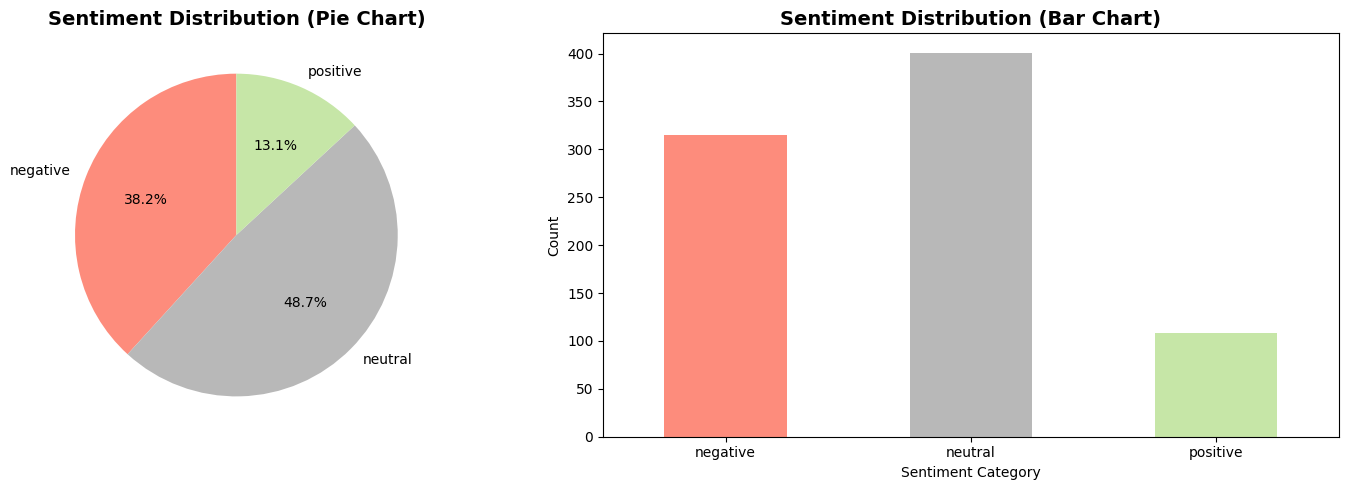

Sentiment distribution:
sentiment_category
negative    315
neutral     401
positive    108
Name: count, dtype: int64


In [198]:
# Create a comprehensive sentiment distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}
colors_list = [sentiment_colors[cat] for cat in sentiment_order]

# Get sentiment counts in consistent order
sentiment_counts = X_reddit_sample['sentiment_category'].value_counts()
sentiment_counts = sentiment_counts.reindex(sentiment_order)

# Pie chart
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors_list, startangle=90)
axes[0].set_title('Sentiment Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
sentiment_counts.plot(kind='bar', ax=axes[1], color=colors_list)
axes[1].set_title('Sentiment Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment Category')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print(f"Sentiment distribution:")
print(sentiment_counts)

**Insight:** The dataset shows significant class imbalance with neutral sentiment dominating at 48.7% (401 posts), followed by negative at 38.2% (315 posts), and positive at only 13.1% (108 posts). This distribution is typical for social media discussions where many posts are informational rather than strongly opinionated.

#### 7.2 Top Frequent Terms

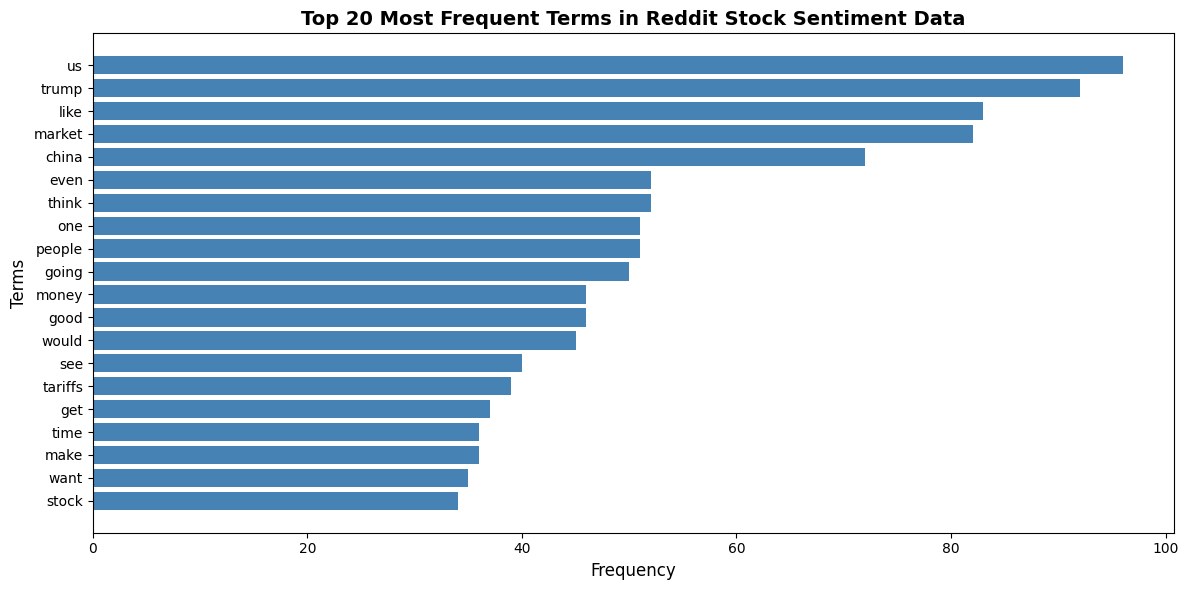

In [199]:
# Visualize top frequent terms
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_terms)), top_freqs, color='steelblue')
plt.yticks(range(len(top_terms)), top_terms)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.title('Top 20 Most Frequent Terms in Reddit Stock Sentiment Data', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:** Political terms dominate the corpus with "trump" (92 occurrences) and "china" (72 occurrences) ranking highly alongside economic terms like "market" (82), "money" (46), and "stock" (34). The term "us" (96) is the most frequent, suggesting discussions about US market conditions. This reveals that political events significantly influence stock market sentiment discussions on Reddit.

#### 7.3 Text Length Distribution by Sentiment

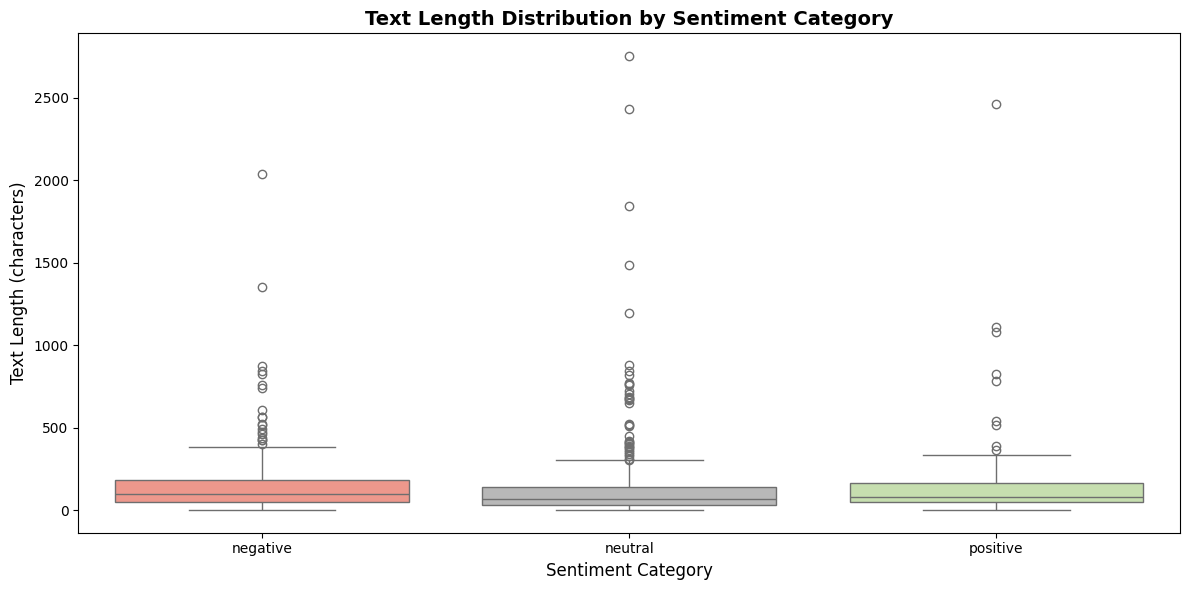

Text length statistics by sentiment:
                    count        mean         std  min   25%   50%     75%  \
sentiment_category                                                           
negative            315.0  153.736508  192.132063  4.0  47.5  96.0  184.50   
neutral             401.0  139.132170  259.276802  1.0  32.0  68.0  141.00   
positive            108.0  165.333333  293.420466  4.0  48.0  81.5  167.25   

                       max  
sentiment_category          
negative            2040.0  
neutral             2753.0  
positive            2461.0  


In [200]:
# Box plot for text length distribution by sentiment
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_reddit_sample, x='sentiment_category', y='text_length', 
            order=sentiment_order,
            palette=sentiment_colors)
plt.title('Text Length Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.tight_layout()
plt.show()

# Display statistics
print("Text length statistics by sentiment:")
print(X_reddit_sample.groupby('sentiment_category')['text_length'].describe().loc[sentiment_order])

**Insight:** Text length shows minimal variation across sentiment categories. Negative posts average 153.7 characters, neutral posts 139.1 characters, and positive posts 165.3 characters. While positive posts are slightly longer on average, the differences are not substantial. All categories show high variability (large standard deviations) and multiple outliers, indicating diverse posting styles within each sentiment group.

#### 7.4 Sentiment Distribution by Subreddit

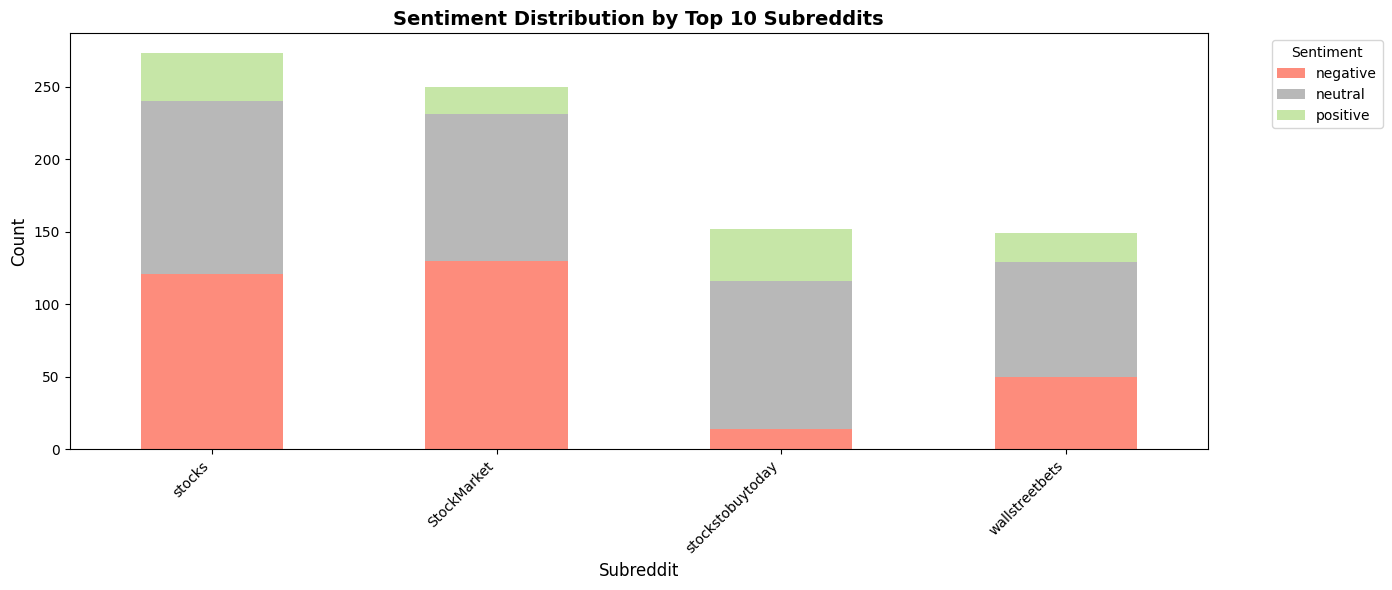

Sentiment distribution by subreddit:
sentiment_category  negative  neutral  positive
subreddit                                      
stocks                   121      119        33
StockMarket              130      101        19
stockstobuytoday          14      102        36
wallstreetbets            50       79        20


In [201]:
# Stacked bar chart for sentiment distribution by subreddit
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}
colors_list = [sentiment_colors[cat] for cat in sentiment_order]

sentiment_by_subreddit = pd.crosstab(X_reddit_sample['subreddit'], 
                                      X_reddit_sample['sentiment_category'])

# Select top subreddits
top_subreddits = X_reddit_sample['subreddit'].value_counts().head(10).index
sentiment_by_subreddit_top = sentiment_by_subreddit.loc[top_subreddits]

# Reorder columns to match consistent order
sentiment_by_subreddit_top = sentiment_by_subreddit_top[sentiment_order]

# Create stacked bar chart
ax = sentiment_by_subreddit_top.plot(kind='bar', stacked=True, figsize=(14, 6),
                                      color=colors_list)
plt.title('Sentiment Distribution by Top 10 Subreddits', fontsize=14, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Sentiment distribution by subreddit:")
print(sentiment_by_subreddit_top)

**Insight:** Different subreddits exhibit distinct sentiment patterns. StockMarket shows more negative sentiment (130 negative vs 101 neutral vs 19 positive), while stockstobuytoday is predominantly neutral and positive (102 neutral, 36 positive vs only 14 negative). The stocks and wallstreetbets subreddits display more balanced distributions. This reflects the unique community cultures and discussion purposes of each subreddit.

#### 7.5 Correlation Heatmap

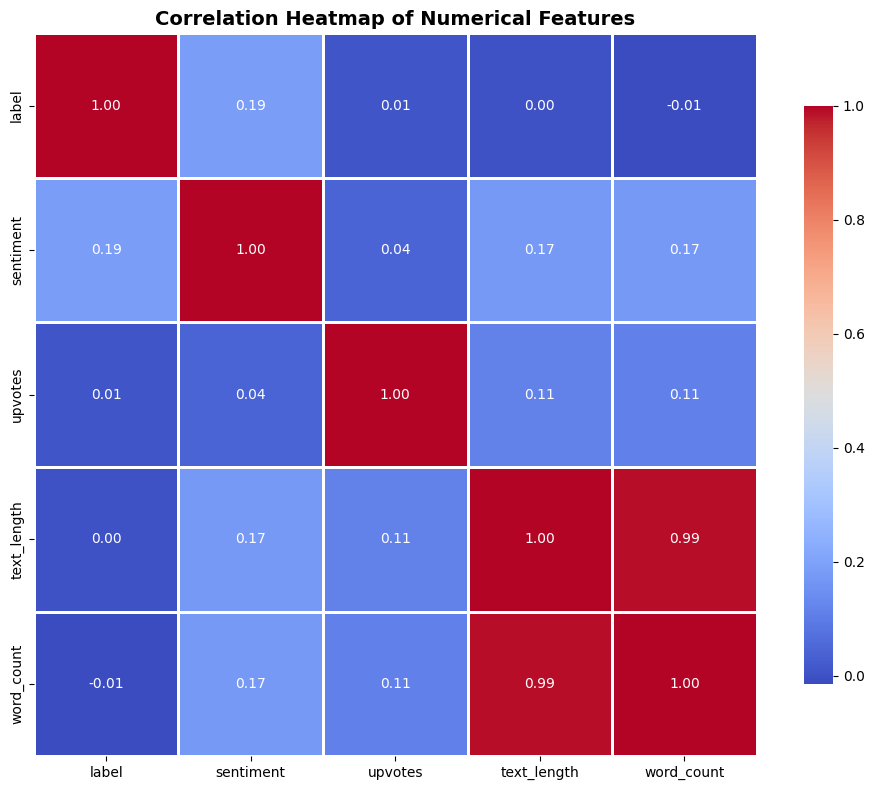

Correlation matrix:
                label  sentiment   upvotes  text_length  word_count
label        1.000000   0.187111  0.009131     0.000720   -0.013829
sentiment    0.187111   1.000000  0.044706     0.173194    0.173510
upvotes      0.009131   0.044706  1.000000     0.113550    0.111305
text_length  0.000720   0.173194  0.113550     1.000000    0.991222
word_count  -0.013829   0.173510  0.111305     0.991222    1.000000


In [202]:
# Create correlation heatmap for numerical features
numerical_features = X_reddit_sample[['label', 'sentiment', 'upvotes', 'text_length', 'word_count']].copy()
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

**Insight:** The correlation analysis reveals weak relationship (0.19) between label and sentiment columns, confirming the data quality issue noted earlier where 54% of rows have inconsistent values. Text length and word count show very strong correlation (0.99), which is expected. Notably, upvotes show minimal correlation with all variables (all correlations < 0.12), indicating that post popularity is not strongly tied to sentiment polarity, text length, or other measured features.

#### 7.6 Time Series Analysis

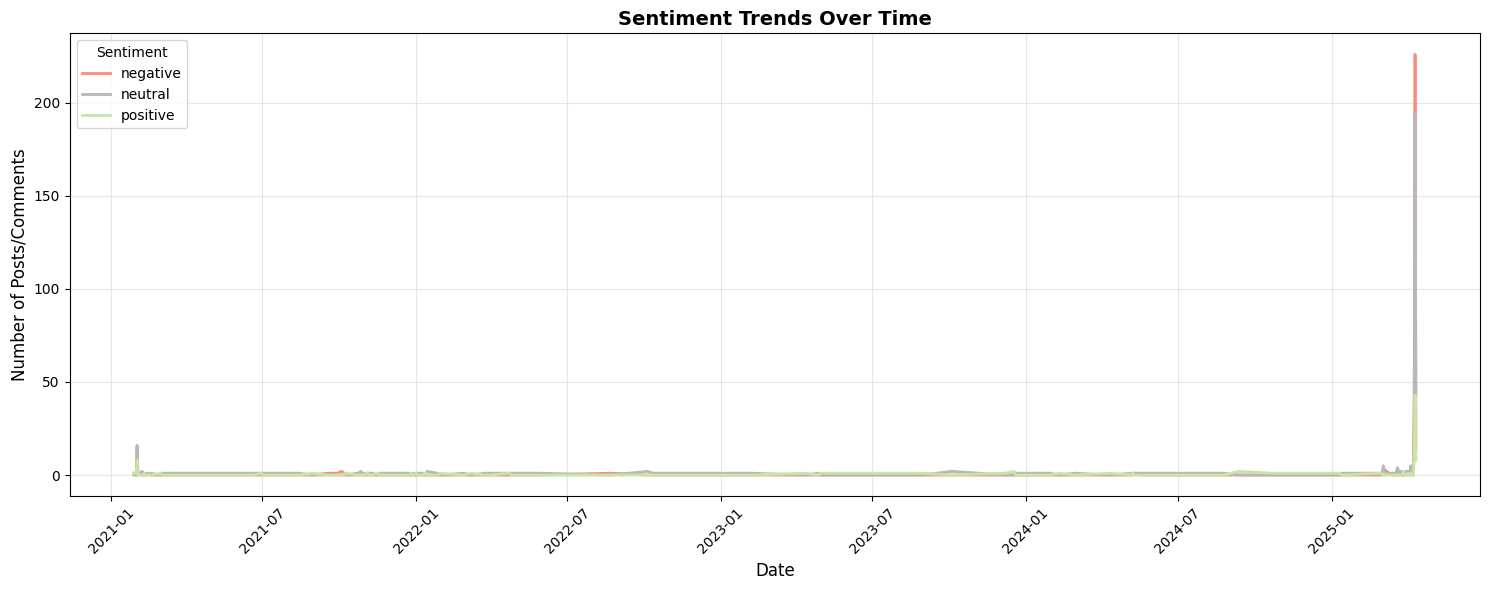

Daily sentiment counts (first 10 days):
sentiment_category  negative  neutral  positive
date                                           
2021-01-28                 1        0         1
2021-01-31                 0        0         1
2021-02-01                15       16         8
2021-02-02                 0        1         0
2021-02-03                 1        0         0
2021-02-07                 0        2         0
2021-02-10                 0        0         1
2021-02-11                 0        1         0
2021-02-12                 1        0         0
2021-02-17                 0        1         0


In [203]:
# Convert datetime to proper format and analyze temporal patterns
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}
colors_list = [sentiment_colors[cat] for cat in sentiment_order]

X_reddit_time = X_reddit_sample.copy()
X_reddit_time['datetime'] = pd.to_datetime(X_reddit_time['datetime'])
X_reddit_time['date'] = X_reddit_time['datetime'].dt.date

# Aggregate sentiment by date
sentiment_time = X_reddit_time.groupby(['date', 'sentiment_category']).size().unstack(fill_value=0)

# Reorder columns to match consistent order
sentiment_time = sentiment_time[sentiment_order]

# Plot time series
fig, ax = plt.subplots(figsize=(15, 6))
sentiment_time.plot(ax=ax, color=colors_list, linewidth=2)
plt.title('Sentiment Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts/Comments', fontsize=12)
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Daily sentiment counts (first 10 days):")
print(sentiment_time.head(10))

**Insight:** The time series reveals a concentrated burst of activity in late January 2025, with a massive spike on 2025-01-31 showing over 200 posts across all sentiments (primarily negative and neutral). Prior to this, activity was sporadic with only occasional posts from 2021-2023. This pattern suggests the dataset may focus on a specific recent market event or that data collection was concentrated in this period.

#### 7.7 Word Count Distribution by Sentiment

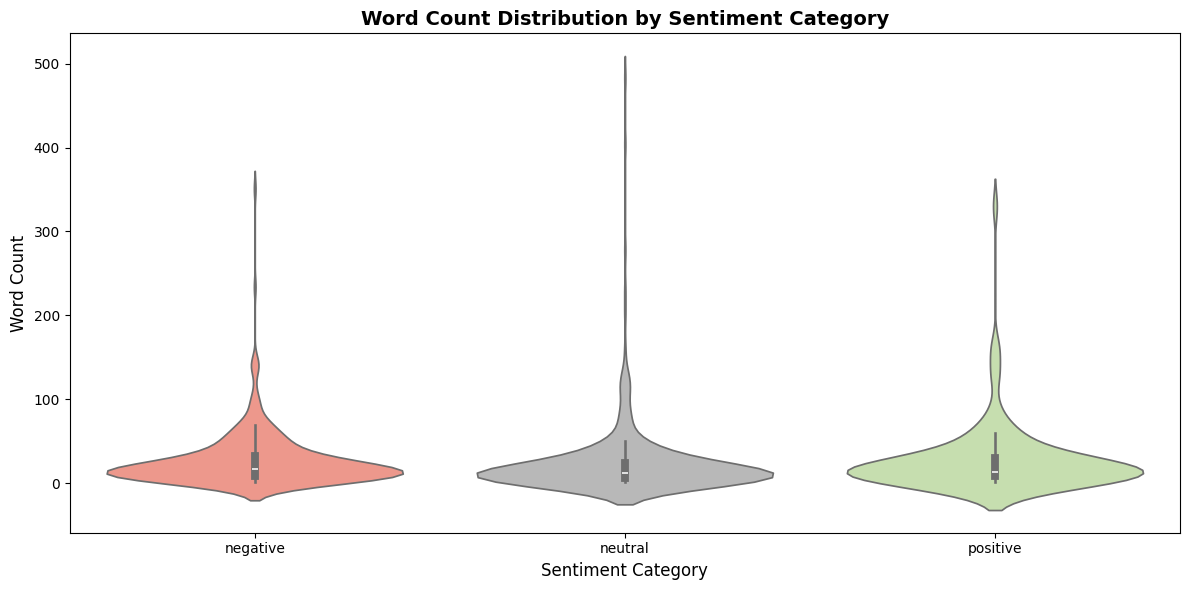

Word count statistics by sentiment:
                    count       mean        std  min  25%   50%    75%    max
sentiment_category                                                           
negative            315.0  27.441270  33.479990  1.0  9.0  17.0  33.00  351.0
neutral             401.0  23.890274  43.162286  1.0  6.0  12.0  24.00  483.0
positive            108.0  27.851852  41.856411  1.0  9.0  14.0  30.25  330.0


In [204]:
# Violin plot for word count distribution
# Define consistent color scheme and order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_colors = {'negative': '#FD8C7C', 'neutral': '#B8B8B8', 'positive': '#C6E6A7'}

plt.figure(figsize=(12, 6))
sns.violinplot(data=X_reddit_sample, x='sentiment_category', y='word_count',
               order=sentiment_order,
               palette=sentiment_colors)
plt.title('Word Count Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.tight_layout()
plt.show()

# Display statistics
print("Word count statistics by sentiment:")
print(X_reddit_sample.groupby('sentiment_category')['word_count'].describe().loc[sentiment_order])

**Insight:** Word count distributions across sentiments mirror the text length patterns. The median word count is low across all categories (negative: ~17 words, neutral: ~12 words, positive: ~14 words), with most posts containing fewer than 30 words. The violin plot reveals that all sentiment categories have similar distribution shapes with long tails, indicating occasional very lengthy posts regardless of sentiment.

---

### Summary of Phase 1 Analysis

**Dataset Overview:**
- Final dataset: 824 unique Reddit posts (after removing 23 duplicates)
- Time period: Primarily concentrated in late January 2025 with sporadic earlier posts
- Class distribution: 401 neutral (48.7%), 315 negative (38.2%), 108 positive (13.1%)
- Data quality issue: 54% inconsistency between 'label' and 'sentiment' columns (458 rows)

**Key Characteristics:**
- **Text properties:** Median 79.5 characters, 14 words; 75th percentile at 30 words
- **Top terms:** "us" (96), "trump" (92), "like" (83), "market" (82), "china" (72)
- **Missing values:** Original dataset has 92.44% missing in downvotes/upvote_ratio columns
- **Subreddit patterns:** StockMarket is more negative; stockstobuytoday is more neutral/positive

**Feature Engineering:**
- Created 1000-dimensional sparse matrix using CountVectorizer
- Extracted text_length and word_count features
- Removed English stopwords; applied min_df=2 threshold
- Term-document matrix shape: (824, 1000)

**Main Insights:**
1. Political events (Trump, China) heavily influence stock sentiment discussions
2. Upvotes show minimal correlation with sentiment (r < 0.12)
3. Text length and word count are highly correlated (r = 0.99) but don't vary significantly across sentiments
4. Dataset is imbalanced and temporally concentrated, requiring careful handling in classification
5. Different subreddit communities exhibit distinct sentiment patterns

---

# Phase 2

In [205]:
### Begin Assignment Here